In [1062]:
import csv
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


In [1063]:
city_file = "city_data.csv"
ride_file = "ride_data.csv"
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

In [1064]:
 
combined_df = pd.merge(ride_df,city_df,how='left',on=['city','city'])
combined_df.tail()


,city,date,fare,ride_id,driver_count,type
2402,West Kevintown,2016-02-10 00:50:04,34.69,9595491362610,5,Rural
2403,East Troybury,2016-03-14 01:55:32,38.80,9205811495606,3,Rural
2404,North Whitney,2016-01-26 01:06:41,34.92,4165974278063,10,Rural
2405,South Joseph,2016-09-28 07:30:55,12.55,4336212615821,3,Rural
2406,South Elizabethmouth,2016-04-21 10:20:09,16.50,5702608059064,3,Rural


In [1065]:

#combined_df.fillna(1)
Ride_Type = combined_df.groupby('city')['type'].max()
Total_drivers = combined_df.groupby('city').max()['driver_count']
Total_rides = combined_df.groupby('city').count()['ride_id']
Average_Fare = combined_df.groupby('city').mean()['fare']





In [1066]:
chart_df = pd.DataFrame({"Ride_Type": Ride_Type,
                         "Total_Drivers_per_City": Total_drivers,
                         "Total_Rides_per_City": Total_rides,
                         "Average_Fare": Average_Fare})
                         


#chart_df["Average Fare"] = chart_df["Average Fare"].map("${:,.2f}".format)



In [1067]:
chart_df = chart_df[["Ride_Type", "Total_Drivers_per_City", "Total_Rides_per_City", "Average_Fare"]]

In [1068]:
chart_df.head()

,Ride_Type,Total_Drivers_per_City,Total_Rides_per_City,Average_Fare
city,,,,
Alvarezhaven,Urban,21,31,23.928710
Alyssaberg,Urban,67,26,20.609615
Anitamouth,Suburban,16,9,37.315556
Antoniomouth,Urban,21,22,23.625000
Aprilchester,Urban,49,19,21.981579


In [1069]:
x = chart_df['Total_Rides_per_City']
y = chart_df['Average_Fare']
z = chart_df['Total_Drivers_per_City']
colors = "lightskyblue", "lightcoral", "Gold"
city_type = "Urban", "Suburban", "Rural"
plt.scatter(x, y, s=z[::-1]*4, c=colors, alpha=0.2, edgecolors='Grey', label="City Type", linewidth=3)

#Total_Rides_per_City, Average_Fare, Total_rides = x, y, z
#colors = ['Gold', 'Light Sky Blue', 'Light Coral']
#chart_df.plot(kind="scatter", x="Total_Drivers_per_City", y="Average_Fare", grid=True, figsize=(20,10),
              #title="Pyber Ride Data")

plt.axis([0,70,0,70])
plt.xlabel("Total Number of Rides " + "(" + "Per City" + ")")
plt.ylabel("Average Fare " + "(" + "$" + ")")
plt.title("Pyber Ride Sharing Data")  
plt.legend() 

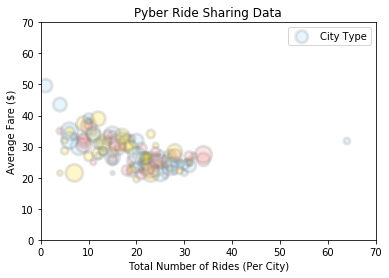

In [1070]:
plt.show()

In [1071]:
#combined_df["fare"] = combined_df["fare"].map("${:,.2f}".format)
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [1072]:
Sum_fares = combined_df['fare'].sum()
Total_fares = combined_df.groupby('type').sum()['fare']
#N = 125
#for in N:
Total_fares_df = pd.DataFrame(Total_fares)  


In [1073]:

#def main():
Percents = []
for index, row in Total_fares_df.iterrows():
    print(index, row['ride_id']/Sum_rides)
    Percents.append(row['ride_id']/Sum_rides)

Rural 0.0657978645759
Suburban 0.314457503056
Urban 0.619744632369


In [1074]:
#explode = (0.1,0,0,0,0,0.5,0,0,0,0)
#colors = "lightskyblue", "lightcoral", "Gold"
#pct_fares = 

In [1075]:
#plt.pie(pct_fares, explode=explode, labels=pies, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        #autPopct="%1.1f%%", shadow=True, startangle=140)#
#plt.axis("equal")

In [1076]:
labels = ['Rural', 'Suburban', 'Urban']
Percents = [7, 31, 62]

In [1116]:
explode = (0.1,0,0.5)
colors = "lightskyblue", "lightcoral", "Gold"

In [1122]:

plt.pie(Percents, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x20bde484f98>,
 [Text(-1.03233,0.611792,'Rural'),
  Text(-0.972796,-0.513487,'Suburban'),
  Text(1.5175,0.507143,'Urban')],
 [Text(-0.602194,0.356878,'5.2%'),
  Text(-0.530616,-0.280084,'27.3%'),
  Text(1.04328,0.348661,'67.5%')])

In [1123]:
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.legend()

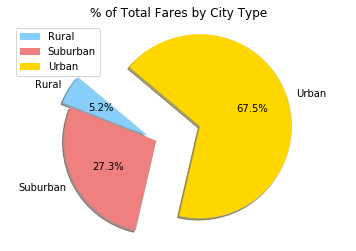

In [1124]:
plt.show()

In [1081]:
#% of Total Rides by City Type
#combined_df.loc[:, 'ride_id','type'].apply(max, axis=0)
Total_rides = combined_df.groupby('type').count()['ride_id']
Total_rides_df = pd.DataFrame(Total_rides)
Sum_rides = combined_df['ride_id'].count()


In [1102]:
Percents = []
for index, row in Total_rides_df.iterrows():
    print(index, row['ride_id']/Sum_rides)
    Percents.append(row['ride_id']/Sum_rides)
    

Rural 0.0519318653926
Suburban 0.272953884504
Urban 0.675114250104


In [1113]:
labels = ['Rural', 'Suburban', 'Urban']
explode = (0.1,0,0.5)
colors = "lightskyblue", "lightcoral", "Gold"

In [1114]:
plt.pie(Percents, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x20bde3d1ef0>,
 [Text(-1.03233,0.611792,'Rural'),
  Text(-0.972796,-0.513487,'Suburban'),
  Text(1.5175,0.507143,'Urban')],
 [Text(-0.602194,0.356878,'5.2%'),
  Text(-0.530616,-0.280084,'27.3%'),
  Text(1.04328,0.348661,'67.5%')])

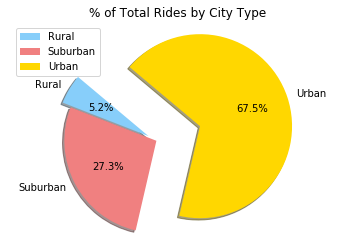

In [1115]:
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.legend()
plt.show()

In [1094]:
Total_drivers = combined_df.groupby('type').sum()['driver_count']
Total_drivers_df = pd.DataFrame(Total_drivers)
Sum_drivers = combined_df['driver_count'].sum()
Total_drivers

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [1095]:
for index, row in Total_drivers_df.iterrows():
    print(index, row['driver_count']/Sum_drivers)
    next 

Rural 0.00969876464153
Suburban 0.129806024707
Urban 0.860495210651


In [1097]:
labels = ['Rural', 'Suburban', 'Urban']
Percents = [9, 12, 86]
explode = (0.1,0,0,0,0,0.5,0,0,0,0)
colors = "lightskyblue", "lightcoral", "Gold"

In [1125]:
plt.pie(Percents, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x20bde4ea438>,
 [Text(-1.03233,0.611792,'Rural'),
  Text(-0.972796,-0.513487,'Suburban'),
  Text(1.5175,0.507143,'Urban')],
 [Text(-0.602194,0.356878,'5.2%'),
  Text(-0.530616,-0.280084,'27.3%'),
  Text(1.04328,0.348661,'67.5%')])

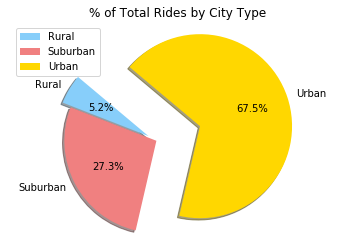

In [1126]:
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.legend()
plt.show()